#  Apartado 1

Breve descripción de algunos detalles de la implementación. Solo 
es necesario especificar los siguientes aspectos: <br>
## a) Generación de la población inicial con especial indicación del número de reglas por individuo consideradas.

La llamada al clasificador se hace, como en las anteriores practicas desde el main, especial atencion al numero de los argumentos de llamada, ya que todos son relevantes.

Para la creacion de la poblacion se utilizan varios bucles. Como base la variable
de numero de individuos por poblacion pasado como parametro en la llamada al clasificador genetico
se genera el individuo introduciendole un numero de reglas aleatorias entre 1 y el numero de reglas
especificado por parametro en la misma llamada de antes. Estas reglas contendran una base de un 90% de ceros que no afectaran al entrenamiento y los restantes atributos se les asignaran un numero aleatorio dentro de rango de k intervalos que haya.
<br><br>


In [ ]:
clasificador=cl.ClasificadorAlgoritmoGenetico("ClasificadorAlgoritmoGenetico",
 np.array(()), np.array(()), list(), dict(), 10,80,10,5,2,40,priori,True)
 #numPoblacion
 #probCruce
 #probMutacion
 #numEpocas
 #probSupervivientes
 #numReglas
 #priori
 #flagBinario

## b)Mecanismo de cruce implementado 

El mecanismo de cruce utilizado es simple. Se escogen de dos en dos desde el inicio, parejas de cromosomas. Se calcula un número aleatorio desde 0 al max de reglas por cromosoma. Dicho número aleatorio marcará desde donde se cogeran las reglas a intercambiar con el otro cromosoma. Una vez realizados los cortes, estos se intercambian pasando a ser parte del otro comosoma.

En este caso el algoritmo en binario y decimal trabajan de la misma forma, ya que cambiariamos la regla entera, con todos los intervalos juntos.



In [ ]:
def cruce(self,poblacion):
    """
    """
    hijos=[]    

    for i in range(0,len(poblacion),2):
      cromosoma0 = poblacion[i]
      if len(poblacion)%2 == 0:
        cromosoma1 = poblacion[i+1]
      else:
        cromosoma1 = poblacion[i]

      if np.random.randint(100) < self.probCruce :

        corteCromo0 = np.random.randint(len(cromosoma0.reglas))
        corteCromo1 = np.random.randint(len(cromosoma1.reglas))

        reglasCorteCromo0 = cromosoma0.reglas[corteCromo0:]
        reglasCorteCromo1 = cromosoma1.reglas[corteCromo1:]

        del cromosoma0.reglas[corteCromo0:]
        del cromosoma1.reglas[corteCromo1:]

        cromosoma0.reglas+=reglasCorteCromo0
        cromosoma1.reglas+=reglasCorteCromo1

      hijos.append(copy.deepcopy(cromosoma0))
      hijos.append(copy.deepcopy(cromosoma1))

    return hijos

## c)Mecanismo de mutación implementado

Consta de 3 bucles anidados, diferenciando entre:<br>
---1) Individuo de la poblacion<br>
---2) Regla del indiviuo<br>
---3) Cada atributo de la regla<br>
En caso del algoritmo en modo binario:<br>
---3) Array de intervalos<br>
---4) Atributos de cada intervalo<br>


Las mutaciones se basan en una probabilidad pasada por parametro en la llamada al clasificador genetico. Por cada atributo de cada regla se genera un numero aleatorio que siendo menor que la probabilidad pasada por parametro cambiara el valor de ese atributo por uno aleatorio entre el numero de intervalos, en caso de aleatorio cambiará 0 por 1 y viceversa.
<br><br>

In [ ]:
  def mutacion(self,poblacion):

    for indivi in poblacion:
      for regla in indivi.reglas:
        if self.binario == False:
          for att in range(len(regla)):
            if np.random.randint(100) < self.probMutacion:
              valor = np.random.randint(self.numIntervalos)
              regla[att]=valor
        else:
          for att in regla[:len(regla)-1]:
            for i in range(len(att)):
              if np.random.randint(100) < self.probMutacion:
                if att[i] == 0:
                  att[i] = 1
                else:
                  att[i] = 0
    return poblacion

#  Apartado 2

Resultados de la clasificación para los siguientes 
casos: 
<br><br>
a)
Tamaño de población = 100 ; Generaciones = 100 
<br><br>
El resultado de la clasificacion es: Porcentaje error: 39.7887323943662 %
<br><br>
b)
Tamaño de población = 100 ; Generaciones = 200 
<br><br>
Porcentaje error: 37.32394366197183 %
<br><br>
c)
Tamaño de población = 200 ; Generaciones = 100 
<br><br>
200 / 100 = Porcentaje error: 38.732394366197184 %
<br><br>
d)
Tamaño de población = 200 ; Generaciones = 200 
<br><br>
200 / 200 = Porcentaje error: 36.971830985915496 %
<br><br>

#  Apartado 3

## Análisis de resultados: importancia del número de reglas, tamaño de la población, generaciones, tasas de cruce y mutación. Importancia de la representación (enteros o cadenas binarias) 


A la hora de generar la poblacion, hay que tener varios parametros en cuenta, pudiendo diferenciar:<br>
<br>
<b>Numero de reglas:</b> Importante tener un numero adecuado de reglas, consiguiendo mejor fitness a la hora de hacer el entrenamiento respecto de la base de datosTrain.<br>
Un numero bajo sería poco útil ya que no tendría suficiente variedad y poco margen de mejora.<br>
Un numero alto sería muy aconsejado puediendo tener asi mas variedad, pero aumentaría el coste de computacion de forma considerable.<br>
<br>
<b>Generacion</b>: Cuantas mas generación mas mejora la población y por tanto mas se ajusta al modelo de entrenamiento de datosTrain y en consecuencia, mejor clasificará.<br>
Un numero bajo de generacion, disminuiría el coste computacional pero ajustaría poco a la hora de entrenar.<br>
Un numero alto de generacion, aumentaría el coste comutacional y a su vez, aumentaría el ajuste realizado en entrenamiento.<br>
<br>
<b>Tasa de cruce:</b> La tasa de cruce influye a la hora de juntar cada pareja de cromosomas, esta tasa de cruce no aumenta el coste computacion de forma notoria. Se ha de recalcar la funcionalidad de nuestro cruce en el apartado 1, ya que podría tomarse de diferentes formas y todas ellas aptas. Al realizar el cruce podemos obtener una mayor diversidad de los individuos de la poblacion, siendo asi posible mejorar la generacion.<br>
<br>
<b>Mutacion:</b> La mutacion, es una operacion poco habitual ya que, si aumentamos la probabilidad de mutacion, los cruces realizados podrían empeorar y ser en vano, no obstante, a veces la mutacion (aunque aleatoria) mejora nuestra poblacion.<br>
<br>
<br>
Por último, diferencia la notacion en binaria o entero.<br>
<b>Entero:</b> Buen funcionamiento aunque poco ajuste aunque se aumente el numero de generaciones, no se ha podido obtener mejor que un 70% de acierto, variando numero de individuos, reglas y demas parametros.<br>
<br>
<b>Binario:</b> Excelente funcionamiento, aunque el coste computacional aumenta de forma exagerada, puediendo tener un coste de NumeroReglas*NumeroDeIntervalos*NumeroDeCromosomas, haciendo de esta ejecución la más costosa y mas pesada de realizar.<br>


#  Apartado 4

Máximo Fitness: 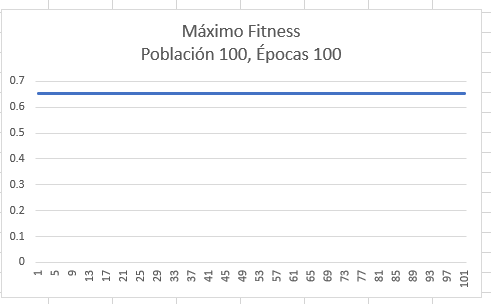

Fitness Medio: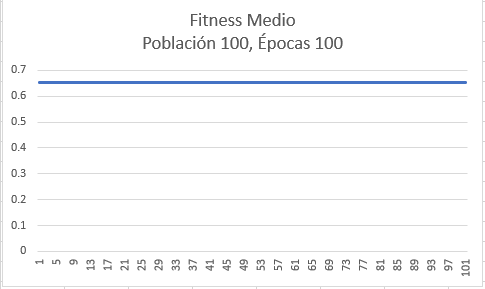

Aqui se puede observar lo que se muestra por pantalla al ejecutar el programa:<br>
------- Epoca  0 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  1 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  2 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  3 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  4 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  5 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  6 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  7 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  8 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  9 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  10 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  11 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  12 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  13 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  14 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  15 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  16 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  17 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  18 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  19 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  20 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  21 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  22 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  23 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  24 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  25 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  26 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  27 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  28 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  29 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  30 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  31 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  32 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  33 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  34 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  35 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  36 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  37 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  38 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  39 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  40 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  41 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  42 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  43 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  44 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  45 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  46 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  47 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  48 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  49 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  50 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  51 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  52 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  53 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  54 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  55 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  56 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  57 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  58 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  59 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  60 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  61 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  62 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  63 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  64 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  65 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  66 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  67 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  68 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  69 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  70 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  71 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  72 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  73 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  74 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  75 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  76 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  77 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  78 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  79 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  80 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  81 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  82 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  83 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  84 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  85 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  86 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  87 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  88 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  89 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  90 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  91 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  92 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  93 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  94 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  95 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  96 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  97 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  98 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
------- Epoca  99 ------------<br>
Maximo fit: 0.6526315789473685<br>
Media fit: 0.6526315789473697<br>
<br>
	Porcentaje error: 39.7887323943662 %


## Output de ejecucion binaria con example4.data
Se puede observar la mejora en el maximo de fitness y por tanto la mejora a su vez de la media de fitness existente en la poblacion.

In [ ]:
Priori 0
------- Epoca  0 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  1 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  2 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  3 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  4 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  5 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  6 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  7 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  8 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  9 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  10 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  11 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  12 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  13 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  14 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  15 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  16 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  17 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  18 -------
                                Prob 1.0
Maximo fit: 0.38
Media fit: 0.37999999999999995
------- Epoca  19 -------
                                Prob 1.0
Maximo fit: 0.60
Media fit: 0.57999999999999995
------- Epoca  20 -------
                                Prob 1.0
Maximo fit: 0.60
Media fit: 0.57999999999999995
------- Epoca  21 -------
                                Prob 1.0
Maximo fit: 0.60
Media fit: 0.57999999999999995
------- Epoca  22 -------
                                Prob 1.0
Maximo fit: 0.60
Media fit: 0.57999999999999995
------- Epoca  23 -------
                                Prob 1.0
Maximo fit: 0.60
Media fit: 0.57999999999999995
------- Epoca  24 -------
                                Prob 1.0
Maximo fit: 0.80
Media fit: 0.77999999999999995
------- Epoca  25 -------
                                Prob 1.0
Maximo fit: 0.80
Media fit: 0.77999999999999995
------- Epoca  26 -------
                                Prob 1.0
Maximo fit: 0.80
Media fit: 0.77999999999999995
------- Epoca  27 -------
                                Prob 1.0
Maximo fit: 0.80
Media fit: 0.77999999999999995
------- Epoca  28 -------
                                Prob 1.0
Maximo fit: 0.1
Media fit: 0.9999999999999995
------- Epoca  29 -------
                                Prob 1.0
Maximo fit: 0.1
Media fit: 0.9999999999999995

    

        Porcentaje error: 0.0 %

A la hora de ejecutar la práctica hemos observado que en la primera epoca se alcanzaba el mejor individuo de todas las generaciones, dicho individuo se usaría para futuras generaciones pudiendo así mejorar la estirpe, rara vez el mejor individuo ha mejorado por la mutación, en el caso del output obtenido en diferentes ejecuciones hemos obtenido una mejora de la media del fitness.<br>
Dicha evolucion supone la mejora de las generaciones, seguramente por el cruce con el progenitor el cual tiene el record de maximo fitness.